# Name: Yunhu_Kim
# Student Number: 2018120195
# Github link : https://github.com/yunhu0110/assignment01

In [54]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv

# Compute Distance 

In [27]:
def computeDistance(vone,vtwo) : # 유클리디안 거리를 통해 distance 찾음
    return np.sqrt(np.sum((vone-vtwo)**2))

# InitialiseLabel

In [28]:
def initialiseLabel(cc,pc,dataFrame) : # 샘플링 (Clustercount 개수중,pointCluster만큼 뽑음 중복가능)
    label = np.random.choice(cc,pc)
    dataf=np.column_stack((dataFrame,label))# dataframe과 label 붙임
    return (dataf)

# Compute Centroid

In [29]:
def computeCentroid(dataFrame,cc) : # 각 클러스터당 평균값을 중심으로하여 반환
    Centroid1 = np.empty((0,785))
    for i in range(cc):
        centroid=np.mean(dataFrame[dataFrame[:,784]==i],axis=0)
        Tcentroid = centroid.reshape(1,785)
        Centroid1 = np.vstack([Centroid1,Tcentroid])
    return (Centroid1)

# assignLabel

In [30]:
def assignLabel(dataFrame,centroid,cc,pc) : # 각 클러스터의 중심값과의 각 인자의 거리를 계산해서 반환
    for i in range(pc):
        Dist = math.inf; 
        Indexd=0;
        distance=0;
        for k in range(cc):
            distance=computeDistance(dataFrame[i:i+1,:784],centroid[k:k+1,:784])
            if distance<Dist:
                Dist=distance;Indexd=k
            dataFrame[i:i+1,784:785]=Indexd
    return (dataFrame)
        

# Compute Energy

In [43]:
def computeEnergy(dataFrame,centroid,cc) : # Costfunction으로서 센트로이드와의 거리의 제곱 합
    energy=0;
    distance=0;
    for i in range(cc):
        idx=dataFrame[dataFrame[:,784]==i]
        rc=np.size(idx,0)
        for k in range(rc):
            distance=computeDistance(idx[k:k+1,:784],centroid[i:i+1,:784])
            energy+=np.square(distance) 
    return (energy)

# Compute Accuracy

In [32]:
def computeAccuracy(dataFrame,trueLabels,cc) :#정확도 계산
    realc=0
    for i in range(cc):
        cl=trueLabels[dataFrame[:,784]==i]
        cl=cl.astype(int)
        label=np.bincount(cl).argmax()
        realc+=sum(cl[:]==label)
        
    accuracy=realc/np.size(dataFrame,0)
    return (accuracy)

# K Means Clustering

In [45]:
def kmenasClustering(dataFrame,true,centroid,cc,pc) : # 앞서 만든 함수들을 토대로 k-means clustering을 수행한다 
    iteration=1;
    resultEnergy=0;
    eneArray=np.array([]);
    accArray=np.array([])
    while True:
        energy=computeEnergy(dataFrame,centroid,cc)
        accuracy=computeAccuracy(dataFrame,true,cc)
        accArray=np.append(accArray,accuracy)
        eneArray=np.append(eneArray,energy)
        if(energy==resultEnergy): 
            break
        resultEnergy=energy
        dataFrame=assignLabel(dataFrame,centroid,cc,pc)
        centroid=computeCentroid(dataFrame,cc)
        iteration+=1
    return (dataFrame,accArray,eneArray)

# Read data & Using K Means Clustering

In [62]:
da=pd.read_csv('C:\mnist_test.csv', sep=',',header=None)
data=np.array(da)

In [70]:
df=data[:,1:]
RealLabels=data[:,0] 
df=initialiseLabel(10,np.size(df,0),df)
centroid = computeCentroid(df,10)
resultDf,resultacc,resultene=  kmenasClustering(df,RealLabels,centroid,10,np.size(df,0))

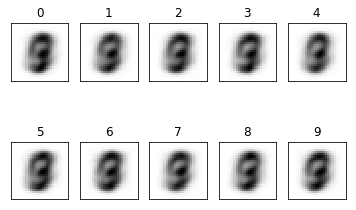

In [65]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

# num_image   = len(data)
# count       = 0     # count for the number of images

centroidImg=centroid[:,:784]
centroidImgT=centroidImg.transpose()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(centroidImgT[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


# Plot

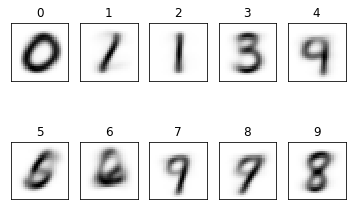

In [71]:
finalCentroid=computeCentroid(finalDf,10)
finalCentroid

for i in range(10):
    cluster=trueLabels[finalDf[:,784]==i]
    cluster=cluster.astype(int)
    label=np.bincount(cluster).argmax()
    finalCentroid[i,784]=label

finalCentroid=finalCentroid[finalCentroid[:,784].argsort()]    

finalCentroidImg=finalCentroid[:,:784]
finalCentroidImgT=finalCentroidImg.transpose()

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(finalCentroidImgT[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
    
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)